In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from librosa import load, logamplitude
from librosa.feature import melspectrogram
from tqdm import tqdm_notebook
from multiprocessing import Pool
import pickle
from scipy.io.wavfile import read, write

In [36]:
def remake_dataset(x):
    data = pickle.load(open(x, "rb"))
    names = [data[i][0] for i in range(len(data))]
    names = [i.split("|")[0][:-4] for i in names]
    specs = np.asarray([data[i][1][:, :44] for i in range(len(data))])
    specs = np.asarray([np.concatenate((specs[i], specs[i], specs[i], specs[i]), axis = 1)[:, :174] 
                        for i in range(len(specs))])
    data = [[names[i], specs[i]] for i in range(len(specs))]
    pickle.dump(data, open(x + "r", "wb"))

In [81]:
current_dir = "./DATA/scmn/"
files = os.listdir(current_dir)

In [82]:
for i in tqdm_notebook(files):
    remake_dataset(current_dir + i)

In [90]:
# sanity check
a = pickle.load(open(current_dir + "d0r", "rb"))
a[2]

['49,105', array([[-33.0386717 , -27.17160872, -22.51196311, ..., -23.51097665,
         -23.94191947, -27.83480898],
        [-19.83072729, -13.96366431,  -9.3040187 , ..., -10.30303224,
         -10.73397506, -14.62686457],
        [-31.47876466, -40.13583908, -28.00440597, ..., -33.12688184,
         -26.72410406, -29.26211388],
        ..., 
        [-71.93417154, -71.10647059, -71.29822199, ..., -66.30382314,
         -67.39649249, -66.51442435],
        [-72.56470007, -73.91499207, -72.94349562, ..., -71.62821049,
         -74.41194361, -74.53001884],
        [-80.        , -80.        , -80.        , ..., -80.        ,
         -80.        , -80.        ]])]

In [72]:
files = os.listdir(current_dir)
for i in files:
    if "r" not in i:
        os.remove(current_dir+i)

In [73]:
files = os.listdir(current_dir)

In [74]:
for i in files:
    os.renames(current_dir + i, current_dir + i[:-1])

In [2]:
def remake_dataset_with_one_note(x):
    data = pickle.load(open(x, "rb"))
    names = [data[i][0][:-4] for i in range(len(data))]
    specs = np.asarray([data[i][1][:, :174] for i in range(len(data))])
    data = [[names[i], specs[i]] for i in range(len(specs))]
    pickle.dump(data, open(x + "r", "wb"))

In [8]:
dirs

['s1mc', 's1rc', 's1rc2', 's1mn', 's1rn', 's1mn2', 's1sc']

In [11]:
all_dirs = os.listdir("./DATA/")
dirs = [directory for directory in all_dirs if "1" in directory]
for i in dirs[:1]:
    current_file = "./DATA/" + i + "/d0"
    remake_dataset_with_one_note(current_file)


In [30]:
a = pickle.load(open("./DATA/s1sc/d0", "rb"))

In [67]:
def change_specs_len(x, y, new_len=150):
    data = pickle.load(open(x, "rb"))
    data1 = pickle.load(open(y, "rb"))
    names = [data1[i][0] for i in range(len(data))]
    specs = np.asarray([data[i][1] for i in range(len(data))])
    data = [[names[i], specs[i]] for i in range(len(specs))]
    pickle.dump(data, open(x + "r", "wb"))

In [68]:
current_dir = "./DATA/scmc/"
names_dir = "./DATA/scmn/"
filesNames = os.listdir(current_dir)
for i in range(len(filesNames)):
    change_specs_len(current_dir + "d" + str(i), names_dir + "d" + str(i))

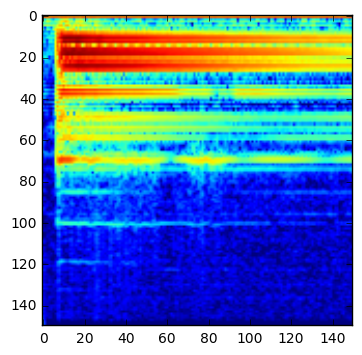

In [81]:
a = pickle.load(open("./DATA/scrc/" + "d0", "rb"))
plt.imshow(a[0][1])

In [82]:
a[0][0]

'61,68,93'

In [83]:
len(a[0][1])

150

In [100]:
specs = []
for i in range(len(data)):
    specs.append(data[i][1])

In [107]:
data[1][1].shape

(150, 242)

In [103]:
specs = np.asarray([data[i][1] for i in range(2)])

ValueError: could not broadcast input array from shape (150,243) into shape (150)

In [95]:
data = pickle.load(open("./DATA/s1rc/d0", "rb"))
san_ch = [data[i][0] for i in range(10)]
print(san_ch)
names = [data[i][0][:-4] for i in range(len(data))]
specs = np.asarray([data[i][1] for i in range(len(data))])
data = [[names[i], specs[i]] for i in range(len(specs))]
pickle.dump(data, open(x + "r", "wb"))

['22.wav', '40.wav', '57.wav', '36.wav', '51.wav', '18.wav', '38.wav', '10.wav', '53.wav', '59.wav']


ValueError: could not broadcast input array from shape (150,243) into shape (150)

In [98]:
data[0][1].shape

(150, 243)

In [130]:
def change_notes_numbers(x):
    data = pickle.load(open(x, "rb"))
    san_ch = [data[i][0] for i in range(68)]
    print(san_ch)
    names = [data[i][0] for i in range(len(data))]
    specs = np.asarray([data[i][1][:, :150] for i in range(len(data))])
    data = [[str(int(names[i])-1), specs[i]] for i in range(len(specs))]
    pickle.dump(data, open(x + "r", "wb"))

In [140]:
change_notes_numbers("./DATA/s1rc/d0r")

['21', '39', '56', '35', '50', '17', '37', '9', '52', '58', '34', '29', '24', '15', '53', '41', '18', '5', '22', '51', '86', '16', '54', '0', '47', '31', '4', '84', '38', '25', '27', '26', '7', '2', '59', '30', '10', '20', '49', '57', '42', '87', '60', '40', '43', '63', '33', '32', '48', '23', '8', '44', '11', '6', '62', '12', '28', '19', '45', '13', '85', '3', '61', '14', '36', '55', '46', '1']


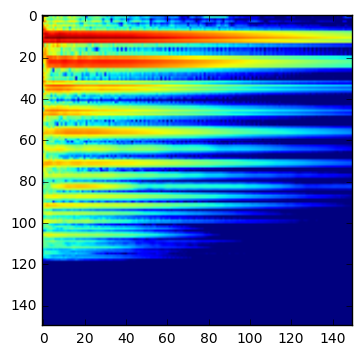

In [141]:
plt.imshow(pickle.load(open("./DATA/s1rc/d0r", "rb"))[1][1])

In [144]:
a = pickle.load(open("./DATA/s1rc/d0r", "rb"))

In [148]:
[int(a[i][0]) for i in range(len(a))] < 88

TypeError: unorderable types: list() < int()